# Stereo Vision 

Stereo Vision is about using two cameras two create a depth map, the way the human eye does. The idea is that two cameras positioned next to eachother on the same plane will view the same scene slightly differently. Those differences account for the shift in perspective. We can emulate that using same math, shown below. 

<img src="img/stereo_depth.jpg" width = "200"/>

x and x′ are the distance between points in image plane corresponding to the scene point 3D and their camera center. B is the distance between two cameras (which we know) and f is the focal length of camera (already known). So in short, above equation says that the depth of a point in a scene is inversely proportional to the difference in distance of corresponding image points and their camera centers. So with this information, we can derive the depth of all pixels in an image. [Source](https://docs.opencv.org/3.1.0/dd/d53/tutorial_py_depthmap.html)

OpenCV allows us to compute these differences and make a depth map quite easily, with 

```python
cv2.StereoBM_create(numDisparities, blockSize)
stereo.compute(imgL,imgR)
```

where

**numDisparities** the disparity search range. For each pixel algorithm will find the best disparity from 0 (default minimum disparity) to numDisparities. The search range can then be shifted by changing the minimum disparity. This value has to be divisble by 16. 

**blockSize**	the linear size of the blocks compared by the algorithm. The size should be odd (as the block is centered at the current pixel). Larger block size implies smoother, though less accurate disparity map. Smaller block size gives more detailed disparity map, but there is higher chance for algorithm to find a wrong correspondence. This number has to be odd and between 5-255.

and imgL and imgR are the left and right images, respectively. 

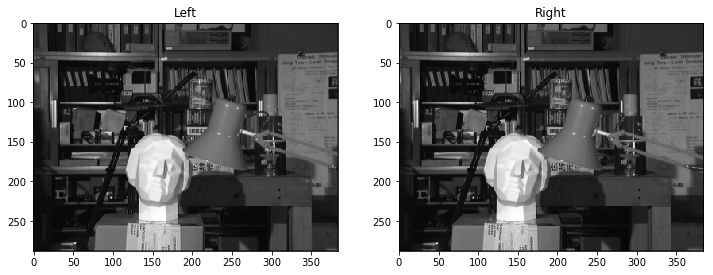

In [110]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('img/l.png',0)
imgR = cv2.imread('img/r.png',0)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Left')
plt.imshow(imgL, cmap ='gray')
plt.subplot(1,2,2)
plt.title('Right')
plt.imshow(imgR, cmap ='gray')
plt.show()

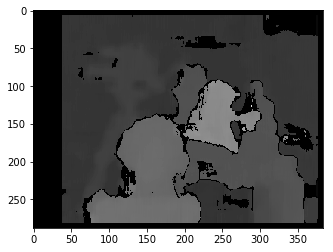

In [111]:
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

Iterate around a space to see the effect of BlockSize and Disparity

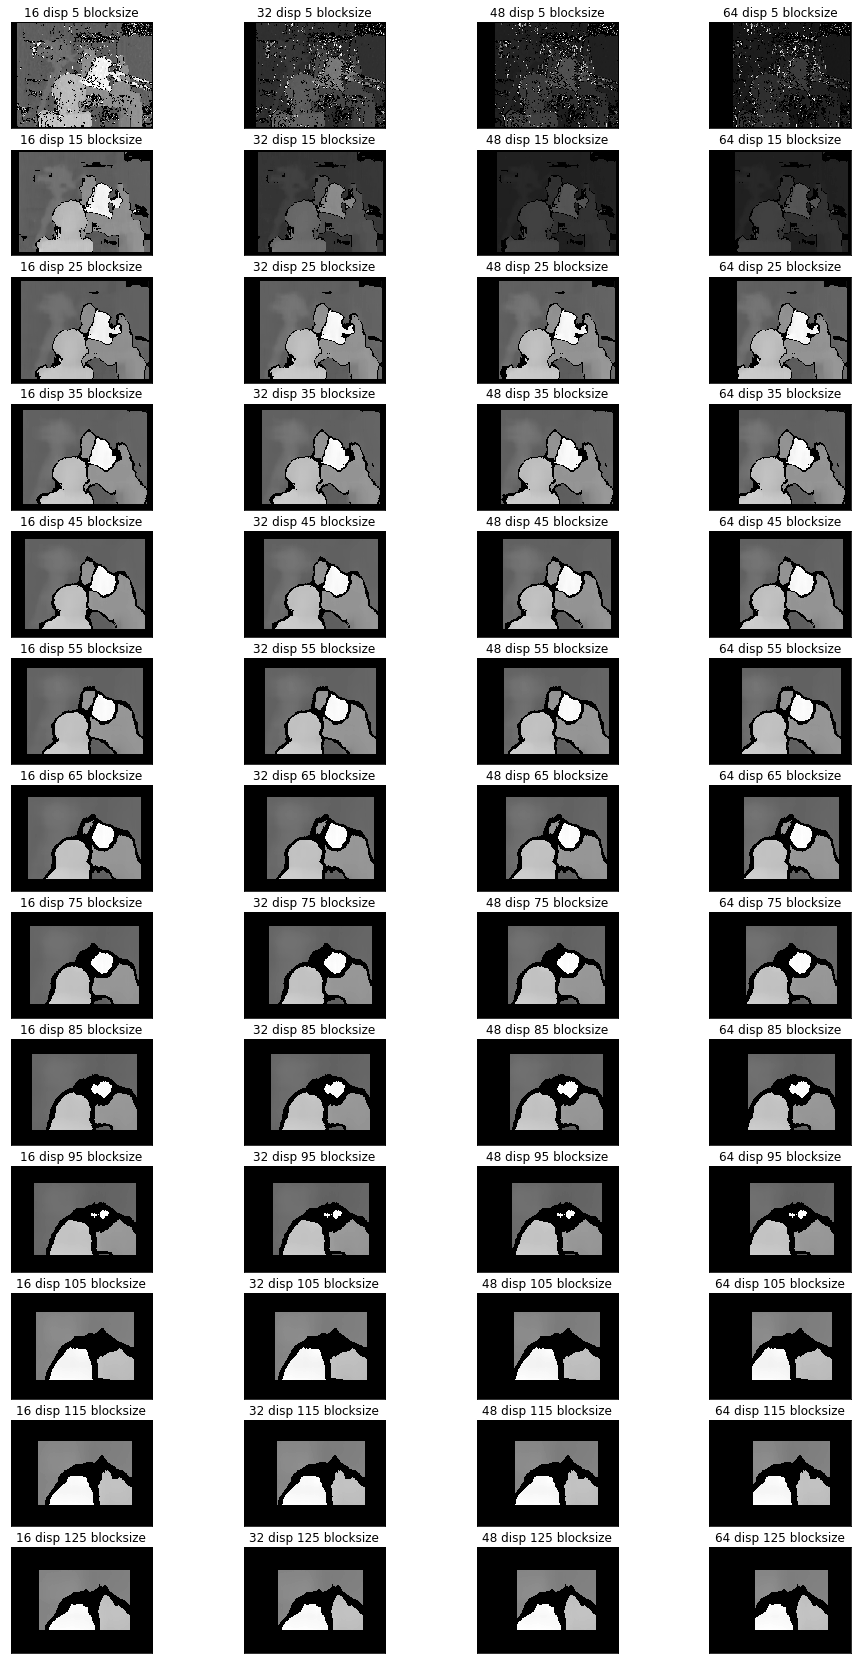

In [112]:
BS = np.linspace(5, 125, int(125/5)).astype(int)[::2]
DISP = np.linspace(16, 16*4, int(16/4)).astype(int)

plt.figure(figsize=(16, 30))
for i, bs in enumerate(BS): 
    for j, disp in enumerate(DISP): 
        start = time.time() #start timer 
    
        stereo = cv2.StereoBM_create(numDisparities=disp, blockSize=bs)
        disparity = stereo.compute(imgL,imgR)
        
        plt.subplot(13, 4, (i*DISP.shape[0])+j+1)
        plt.title('{} disp {} blocksize'.format(disp, bs))
        plt.imshow(disparity,'gray')
        plt.xticks([]); plt.yticks([])
        
plt.show()